Model.score()
* classification : accuracy
* regression : R^2

Confusion Matrix
* Type I error : False Positive
* Type II error : False Negative

Statistical Metrics
* Accuracy = (TP+TF) / ALL RESULTS
* Precision = TP / (TP + FP)
* Recall = TP / (TP + FN)
* F = 2 * (Precision * Recall) / (Precision + Recall) ***OR*** TP / (TP + 0.5 * (FP + FN))
* Speficity = TN / (TN + FP)
<br>

ROC Curves
* summarize the trade-off between the TP rate and FP rate for a predictive model using different probability thresholds.
* appropriate when the observations are balanced between each class <br>

Precision-Recall curves 
* summarize the trade-off between the TP rate and the P predictive value for a predictive model using different probability thresholds.
* appropriate for imbalanced datasets.


# Import Module

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve, roc_curve

from sklearn.datasets import load_digits

# Load Data & Pre-Process

In [12]:
data_obj = load_digits()
X = data_obj.data
y = data_obj.target == 9

<Figure size 432x288 with 0 Axes>

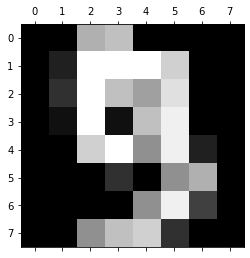

In [20]:
# Example of '9' image

plt.gray() 
plt.matshow(data_obj.images[y==True][0]) 
plt.show() 

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Train Model

In [25]:
model = LogisticRegression(C=0.1, max_iter=500).fit(X_train, y_train)

# Evaluation

## Score (accuracy)

In [26]:
print(f"Train score : {model.score(X_train, y_train)}")
print(f"Test score  : {model.score(X_test, y_test)}")

Train score : 0.9977728285077951
Test score  : 0.9844444444444445


## Confusion Metrics

In [31]:
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)  

#           Predicted = No, Predicted = Yes
# Actual = No  [TN        , FP             ]
# Actual = Yes [FN        , TP             ] 

[[402   1]
 [  6  41]]


## Statistical Metrics

In [32]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.99      1.00      0.99       403
        True       0.98      0.87      0.92        47

    accuracy                           0.98       450
   macro avg       0.98      0.93      0.96       450
weighted avg       0.98      0.98      0.98       450



## Precision Recall Curve

In [34]:
# used when there is a moderate to large class imbalance
precision, recall, threshold = precision_recall_curve(y_test, model.decision_function(X_test))

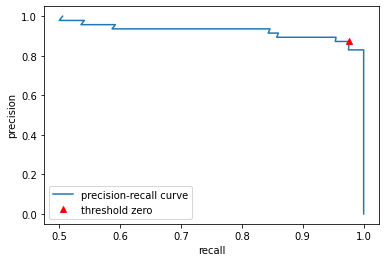

In [36]:
plt.plot(precision, recall, label='precision-recall curve')
c_zero = np.argmin(np.abs(threshold))
plt.plot(precision[c_zero], recall[c_zero], 'r^', label='threshold zero' )
plt.xlabel('recall')
plt.ylabel('precision')
plt.legend()

## ROC Curve

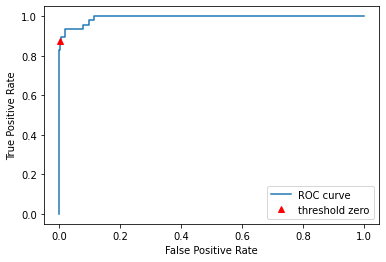

In [37]:
# used when there are roughly equal numbers of observations for each class
fpr, tpr, threshold = roc_curve( y_test, model.decision_function(X_test))
plt.figure()
plt.plot(fpr, tpr, label='ROC curve')
c_zero = np.argmin(np.abs(threshold))
plt.plot(fpr[c_zero], tpr[c_zero], 'r^', label='threshold zero')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()